In [4]:
from main import Main
from plot_data import plot_data

Multiple experiments need to be tried out. This notebook will be used to document the whole process.

First starting with the basic FNN on Warehouse.
Parameters: num_fc_units: [640, 256]

log files and model:
output03-29-2021-18-07-36.txt
Warehouse_03-29-2021-18-07-36.pt

command: `main.py --env-name "Warehouse" --yaml-file FNN --algo ppo --use-gae --lr 2.5e-4 --clip-param 0.1 --value-loss-coef 1 --num-processes 8 --num-steps 4 --num-mini-batch 32 --log-interval 30 --use-linear-lr-decay --entropy-coef 0.01  --cuda-deterministic`


LSTM network on Warehouse
Parameters: num_fc_units: [640]

IAM network on Warehouse

Parameters: num_fc_units: [512, 256], rnn_units: [128]
(num-processes should be equal to num-mini-batch)
command: `main.py --env-name "Warehouse" --yaml-file IAM_static --recurrent-policy --num-processes 8 --num-steps 8 --num-mini-batch 8 --log-interval 30 --use-linear-lr-decay --entropy-coef 0.01 --algo ppo --use-gae --lr 2.5e-4 --clip-param 0.1 --value-loss-coef 1  --cuda-deterministic`

In [ ]:
# import sys
args = "--env-name Warehouse --yaml-file IAM_static --recurrent-policy --num-processes 1 --num-steps 8 --num-mini-batch 1 --log-interval 30 --use-linear-lr-decay --entropy-coef 0.01 --algo ppo --use-gae --lr 2.5e-4 --clip-param 0.1 --value-loss-coef 1"
arg_list = args.split(" ")
main = Main(arg_list)
main.run()

data/output03-29-2021-19-53-54.txt


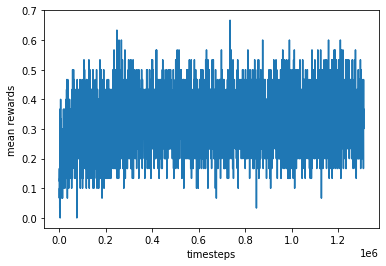

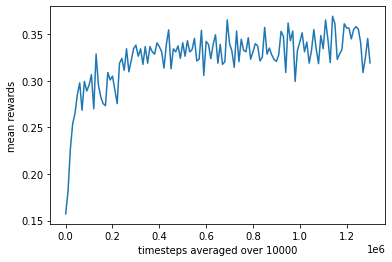

In [5]:
# Trained IAM model: Missing total training time.
# This was one of the first runs. Using a GRU as RNN
plot_data("output03-29-2021-19-53-54.txt")
